In [1]:
import Merge_Cartesian as MC
import numpy as np
from decimal import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget

In [2]:
def gcd_euclid(TL:Decimal,TC:Decimal):

    # print(f'Bezout analysis for TL = {TL}s and TC = {TC}s')
    
    num_big = max(TL,TC)
    num_small = min(TL,TC)
    
    num_big_original = num_big
    num_small_original = num_small
    
    num_big_numerator,num_big_denomenator = num_big.as_integer_ratio()
    num_small_numerator, num_small_denomenator = num_small.as_integer_ratio()
    
    common_den = Decimal(str(num_big_denomenator ))* Decimal(str(num_small_denomenator))
    
    num_big = num_big_numerator * num_small_denomenator
    num_small = num_small_numerator * num_big_denomenator
    
    equations = []
    
    # initialize 
    multiplier, remainder = divmod(num_big,num_small)
    equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
    
    while remainder != 0:
        num_big = num_small
        num_small = remainder
        
        multiplier, remainder = divmod(num_big,num_small)
        equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
        
    GCD_big = num_small
    GCD = GCD_big/common_den
    LCM = num_big_original * num_small_original/(GCD)
    
    K_big = num_small_original/GCD
    K_small = num_big_original/GCD
    
    Factor_dict = dict([('K_big',K_big),('num_big',num_big_original),
                        ('K_small',K_small),('num_small',num_small_original),
                        ('GCD',GCD),('LCM',LCM)])

    return Factor_dict

In [3]:
def arrs_lcm_gcd_decimal(starting_number:Decimal,finishing_number:Decimal,increment:Decimal):

    input_numbers =[]
    input_numbers.append(starting_number)
    
    current_number = starting_number
    while current_number < finishing_number:
        current_number += increment
        input_numbers.append(current_number)
        
    GCD = np.full((len(input_numbers),len(input_numbers)),Decimal('0'))
    LCM = np.full((len(input_numbers),len(input_numbers)),Decimal('0'))
    AREA = np.full((len(input_numbers),len(input_numbers)),Decimal('0'))

    for i,x in enumerate(input_numbers):
        for j,y in enumerate(input_numbers):
            Factor_dict = gcd_euclid(x,y)
            GCD[i,j] = Factor_dict['GCD']
            LCM[i,j] = Factor_dict['LCM']
            AREA[i,j] = Factor_dict['K_big']*Factor_dict['K_small']
        
    return input_numbers,GCD,LCM,AREA

In [8]:
def plot_lcm_gcd_ratio(start:Decimal,end:Decimal,inc:Decimal,ax):
    
    ax[0].get_figure().suptitle(f"The Comparison of Time delays starting at {start}s to {end}s in steps of {inc}s")
    
    input_numbers,gcd_decimal,lcm_decimal,area_decimal = arrs_lcm_gcd_decimal(start,end, inc)
    
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    
    ax[0].xaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    ax[0].yaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    
    ax[1].xaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    ax[1].yaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    
    ax[2].xaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    ax[2].yaxis.set_major_formatter(lambda x, pos: str(x*float(inc)+ float(start) ))
    
    
    MC.plot_fanout_colour(lcm_decimal,ax[0],f"LCM",False)
    MC.plot_fanout_colour(gcd_decimal,ax[1],f"GCD",False)
    MC.plot_fanout_colour(area_decimal,ax[2],f"Relatiability",False)

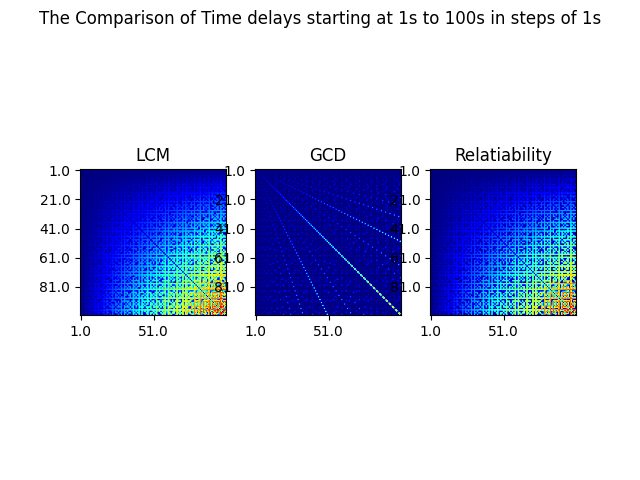

In [7]:
fig_c, ax_c = plt.subplots(1,3)        

start_input = widgets.Text(description = 'Start Num', value='1')
end_input = widgets.Text(description = 'End Num', value='100')
inc_input = widgets.Text(description = '++ Num', value='1')
plot_button = widgets.Button(description = "Plot")

output = widgets.Output()
plot_lcm_gcd_ratio(Decimal(start_input.value),Decimal(end_input.value),Decimal(inc_input.value),ax_c)

def handle_input_change(c):
    plot_lcm_gcd_ratio(Decimal(start_input.value),Decimal(end_input.value),Decimal(inc_input.value),ax_c)
            

plot_button.on_click(handle_input_change)


start_stop = widgets.HBox([start_input,end_input,inc_input,plot_button])

display(start_stop)